# Numerical experiment draft
## Linear regression case, with identity covariance matrix

In [46]:
# import packages here
import numpy as np
import matplotlib.pyplot as plt

In [87]:
# Generate data here

# set random seed
rng = np.random.default_rng(1)

# basic setting
var_epsilon = 1 # variance for noise in linear regression
d = 5 # d = 5,20,100,200
n = int(1e4) # sample size
eta = 1
alpha = 0.501 # step size eta_i = eta * i^{-alpha}
x_star = rng.random(d) # optimal solution
x_0 = np.zeros(d) # initial guess

# mean and variance for generating a_i
# identity covariance matrix case
#
# linear regression model:
# b_i = x_star^\top a_i + \epsilon_i
mean_a = np.zeros(d)
cov_a = np.eye(d)
Asy_cov = np.eye(d) # asymptotic covariance matrix

In [88]:
# F for linear regression
#   F(x) = \mathbb{E} [1/2 (a^T x - b)^2]
#        = 1/2 (x-x_star)@cov_a@(x-x_star) + var_epsilon
def F_LR(x, x_star, var_epsilon):
    return .5 * (x-x_star) @ cov_a @ (x-x_star) + var_epsilon


In [89]:
# run sgd
#
# update rule:
#   a_n: normal distribution (mean_a, cov_a)
#   epsilon_n: normal distribution (0,sigma_epsilon)
#   b_n = a_n^T x_star + epilon_n (assume it is generated instead of computing from a_n and x_star)
#   x_n = x_{n-1} - \eta_n a_n (a_n^T x_{n-1} - b_n)

x_prev = x_0
x_history = []
x_bar_history = []
a_n_history = []
b_n_history = []
F_true = var_epsilon
F_x_history = []
F_x_bar_history = []
lr_history = []
for iter_num in range(n):
    # sample data
    a_n = rng.multivariate_normal(mean_a, cov_a)
    epsilon_n = rng.normal(0, var_epsilon)
    b_n = a_n @ x_star + epsilon_n
    # update learning rate
    eta_n = eta * (1+iter_num)**(-alpha)
    # update rule
    x_n = x_prev - eta_n * (a_n @ x_prev - b_n) * a_n
    # recording
    x_history.append(x_n)
    x_bar_history.append(np.mean(x_history, axis=0))
    a_n_history.append(a_n)
    b_n_history.append(b_n)
    F_x_history.append(F_LR(x_n, x_star, var_epsilon))
    F_x_bar_history.append(F_LR(x_bar_history[iter_num], x_star, var_epsilon))
    lr_history.append(eta_n)
    # output every 100 iter
    if iter_num%100==99:
        print(f'Iter \t[{iter_num+1}/{n}]\t\t finished')
    # debug code


Iter 	[100/10000]	 finished
Iter 	[200/10000]	 finished
Iter 	[300/10000]	 finished
Iter 	[400/10000]	 finished
Iter 	[500/10000]	 finished
Iter 	[600/10000]	 finished
Iter 	[700/10000]	 finished
Iter 	[800/10000]	 finished
Iter 	[900/10000]	 finished
Iter 	[1000/10000]	 finished
Iter 	[1100/10000]	 finished
Iter 	[1200/10000]	 finished
Iter 	[1300/10000]	 finished
Iter 	[1400/10000]	 finished
Iter 	[1500/10000]	 finished
Iter 	[1600/10000]	 finished
Iter 	[1700/10000]	 finished
Iter 	[1800/10000]	 finished
Iter 	[1900/10000]	 finished
Iter 	[2000/10000]	 finished
Iter 	[2100/10000]	 finished
Iter 	[2200/10000]	 finished
Iter 	[2300/10000]	 finished
Iter 	[2400/10000]	 finished
Iter 	[2500/10000]	 finished
Iter 	[2600/10000]	 finished
Iter 	[2700/10000]	 finished
Iter 	[2800/10000]	 finished
Iter 	[2900/10000]	 finished
Iter 	[3000/10000]	 finished
Iter 	[3100/10000]	 finished
Iter 	[3200/10000]	 finished
Iter 	[3300/10000]	 finished
Iter 	[3400/10000]	 finished
Iter 	[3500/10000]	 fin

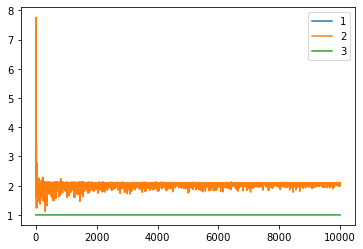

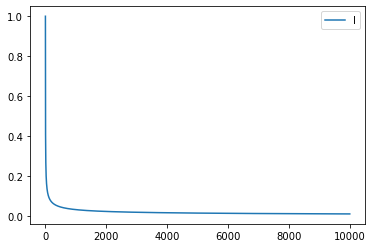

In [92]:
# debug block
plt.plot(F_x_bar_history)
plt.plot(F_x_history)
plt.plot(F_true*np.ones(n))
plt.legend(['1','2','3'])
plt.show()

plt.plot(lr_history)
plt.legend('lr')
plt.show()